In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 23 13:19:46 2019

@author: berka
"""

# libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

#importing datas
MedianHouseholdIncome = pd.read_csv("MedianHouseholdIncome2015.csv",encoding="cp1252")
PercentagePeopleBelowPovertyLevel = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv",encoding="cp1252")
PercentOver25CompletedHighSchool = pd.read_csv("PercentOver25CompletedHighSchool.csv",encoding="cp1252")
PoliceKillingsUS = pd.read_csv("PoliceKillingsUS.csv",encoding="cp1252")
ShareRaceByCity = pd.read_csv("ShareRaceByCity.csv",encoding="cp1252")

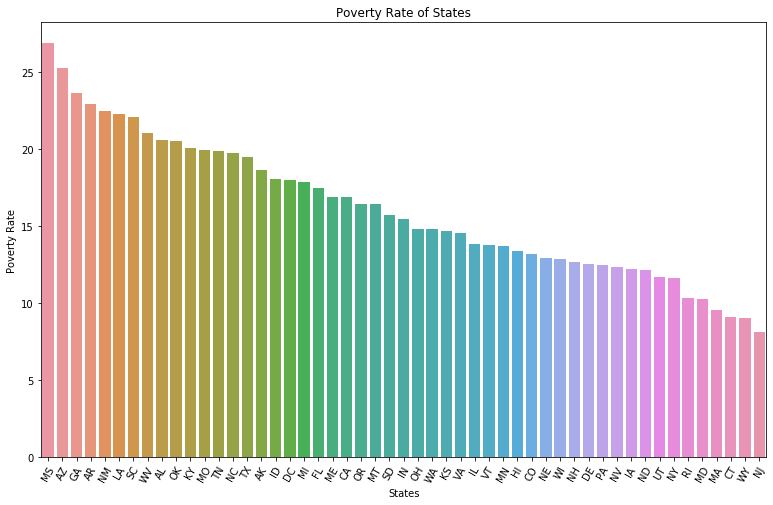

In [2]:
# %% Poverty rate of each state - eyaletlerdeki fakirlik oranı
# Barplot
PercentagePeopleBelowPovertyLevel.head()
# looking for missing values
PercentagePeopleBelowPovertyLevel.poverty_rate.value_counts()

# 201 missing value , what we should do ? Sync to 0
PercentagePeopleBelowPovertyLevel.poverty_rate.replace(['-'],0.0, inplace=True)
PercentagePeopleBelowPovertyLevel.poverty_rate = PercentagePeopleBelowPovertyLevel.poverty_rate.astype(float)

area_list = list(PercentagePeopleBelowPovertyLevel['Geographic Area'].unique()) # make list states
#len(PercentagePeopleBelowPovertyLevel['Geographic Area'].unique()) #51 states

area_poverty_ratio = []

# average poverty rate for each states
for i in area_list:
    x = PercentagePeopleBelowPovertyLevel[PercentagePeopleBelowPovertyLevel['Geographic Area'] == i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)

# do dataframe and sort it
data = pd.DataFrame({'area_list': area_list, 'area_poverty_ratio': area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values #sorting , ascending = decreasing
sorted_data = data.reindex(new_index)

# visualizaton
plt.figure(figsize=(13,8))
sns.barplot(sorted_data['area_list'], sorted_data['area_poverty_ratio'])
plt.xticks(rotation = 60) # put xlabels 60 degrees
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate of States')
plt.show()

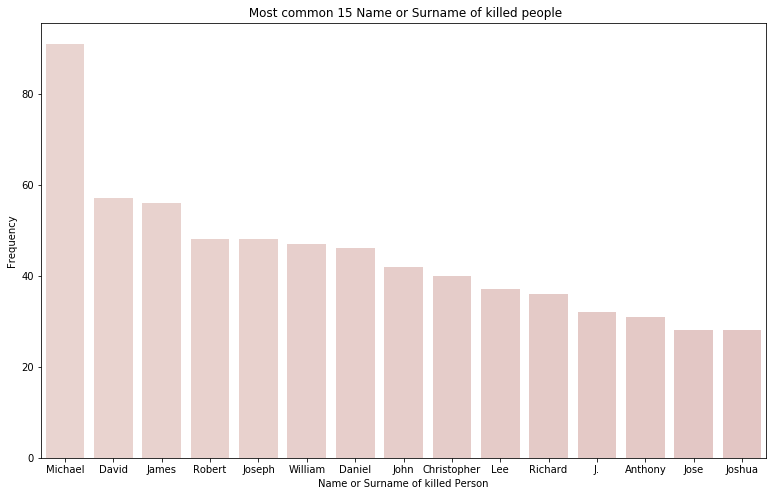

In [3]:
# %% Most common 15 Name or Surname of killed people
# PoliceKillingsUS.name.value_counts()
# filtering and unzipping
seperate = PoliceKillingsUS.name[PoliceKillingsUS.name != 'TK TK'].str.split() # take data who hasn't name 'TK TK' as string
a,b = zip(*seperate) # unzipping
name_list = a+b
name_count = Counter(name_list)
most_common_names = name_count.most_common(15)

# take them as list for visualization
d,c = zip(*most_common_names)
d,c = list(d), list(c)
# visualization
plt.figure(figsize=(13,8))
sns.barplot(d, c, palette= sns.cubehelix_palette(len(x))) # palette > uzunluk sayısı kadar birbiriyle uyumlu farklı renk şeklinde çizdirir
plt.xlabel('Name or Surname of killed Person')
plt.ylabel('Frequency')
plt.title(' Most common 15 Name or Surname of killed people')
plt.show()

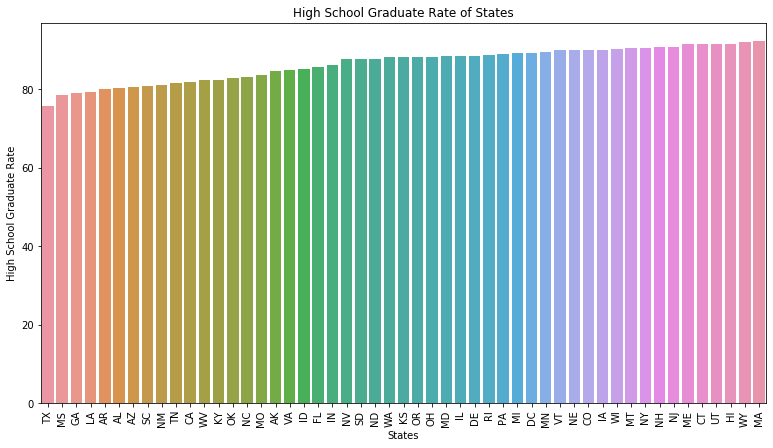

In [4]:
# %% High school graduation rate of the population that is older than 25 states
#this time we did 0 to Nan missing values
PercentOver25CompletedHighSchool.percent_completed_hs.replace(['-'],np.nan, inplace=True)
PercentOver25CompletedHighSchool.dropna(inplace=True) # drop miss values
PercentOver25CompletedHighSchool.percent_completed_hs = PercentOver25CompletedHighSchool.percent_completed_hs.astype(float)

area_list = list(PercentOver25CompletedHighSchool['Geographic Area'].unique()) # make list states
area_hs_grad = []

# average graduation  rate for each states

for i in area_list:
    x = PercentOver25CompletedHighSchool[PercentOver25CompletedHighSchool['Geographic Area'] == i]
    area_hs_grad_ratio = sum(x.percent_completed_hs) / len(x)
    area_hs_grad.append(area_hs_grad_ratio)

# do dataframe and sort it
data = pd.DataFrame({'area_list' : area_list, 'area_hs_grad_ratio' : area_hs_grad})
new_index = (data['area_hs_grad_ratio'].sort_values(ascending=True)).index.values #sorting , ascending = increasing
sorted_data2 = data.reindex(new_index)

# visualization
plt.figure(figsize=(13,7))
sns.barplot(sorted_data2['area_list'], sorted_data2['area_hs_grad_ratio'])
plt.xticks(rotation = 90) # put xlabels 90 degrees
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title('High School Graduate Rate of States')
plt.show()

'\nf, ax = plt.subplots(figsize=(15,7))\nsns.barplot(area_list, share_white, color=\'green\', alpha = 0.5, label = \'White\')\nsns.barplot(area_list, share_black, color=\'blue\', alpha = 0.7, label = \'Black\')\nsns.barplot(area_list, share_native_american, color=\'cyan\', alpha = 0.6, label = \'Native American\')\nsns.barplot(area_list, share_asian, color=\'yellow\', alpha = 0.6, label = \'Asian\')\nsns.barplot(area_list, share_hispanic, color=\'red\', alpha = 0.6, label = \'Hispanic\')\n\nax.legend(loc=\'upper left\', frameon = True) # visibility of legends\nplt.xticks(rotation = 90)\nax.set(xlabel = \'Percentage of Races\', ylabel=\'States\', title = "Percentage of State\'s Population According to Races")\n'

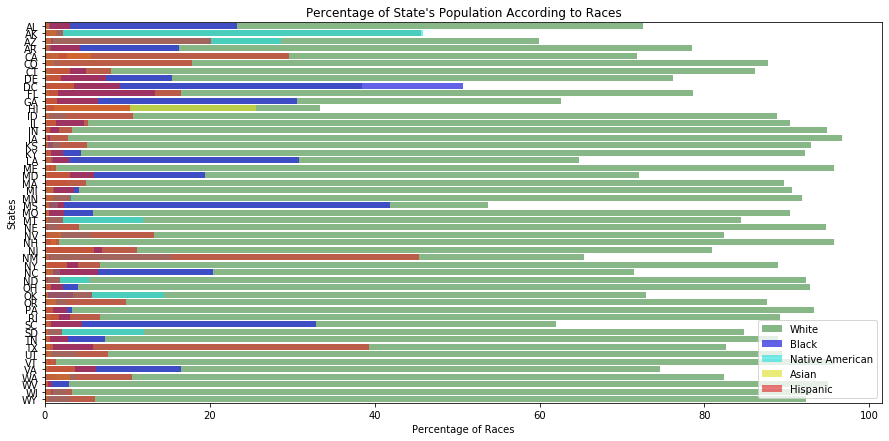

In [5]:
# %% Percentage of state's population according to races that are black,white,native american, asian and hispanic
# ShareRaceByCity.info()
# dropping missing values and typing data
ShareRaceByCity.replace(['-'],np.nan, inplace=True)
ShareRaceByCity.replace(['(X)'],np.nan, inplace=True)
ShareRaceByCity.dropna(inplace=True) # drop miss values
ShareRaceByCity.loc[:, 'share_white':'share_hispanic'] = ShareRaceByCity.loc[:, 'share_white':'share_hispanic'].astype(float)

area_list = list(ShareRaceByCity['Geographic area'].unique()) # make list states
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []

# average race ratio for each states
for i in area_list:
    x = ShareRaceByCity[ShareRaceByCity['Geographic area'] == i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))

# visualization
f, ax = plt.subplots(figsize=(15,7))
sns.barplot(share_white, area_list,color='green', alpha = 0.5, label = 'White')
sns.barplot(share_black, area_list,color='blue', alpha = 0.7, label = 'Black')
sns.barplot(share_native_american, area_list,color='cyan', alpha = 0.6, label = 'Native American')
sns.barplot(share_asian, area_list,color='yellow', alpha = 0.6, label = 'Asian')
sns.barplot(share_hispanic, area_list,color='red', alpha = 0.6, label = 'Hispanic')

ax.legend(loc='lower right', frameon = True) # visibility of legends
ax.set(xlabel = 'Percentage of Races', ylabel='States', title = "Percentage of State's Population According to Races")

"""
f, ax = plt.subplots(figsize=(15,7))
sns.barplot(area_list, share_white, color='green', alpha = 0.5, label = 'White')
sns.barplot(area_list, share_black, color='blue', alpha = 0.7, label = 'Black')
sns.barplot(area_list, share_native_american, color='cyan', alpha = 0.6, label = 'Native American')
sns.barplot(area_list, share_asian, color='yellow', alpha = 0.6, label = 'Asian')
sns.barplot(area_list, share_hispanic, color='red', alpha = 0.6, label = 'Hispanic')

ax.legend(loc='upper left', frameon = True) # visibility of legends
plt.xticks(rotation = 90)
ax.set(xlabel = 'Percentage of Races', ylabel='States', title = "Percentage of State's Population According to Races")
"""

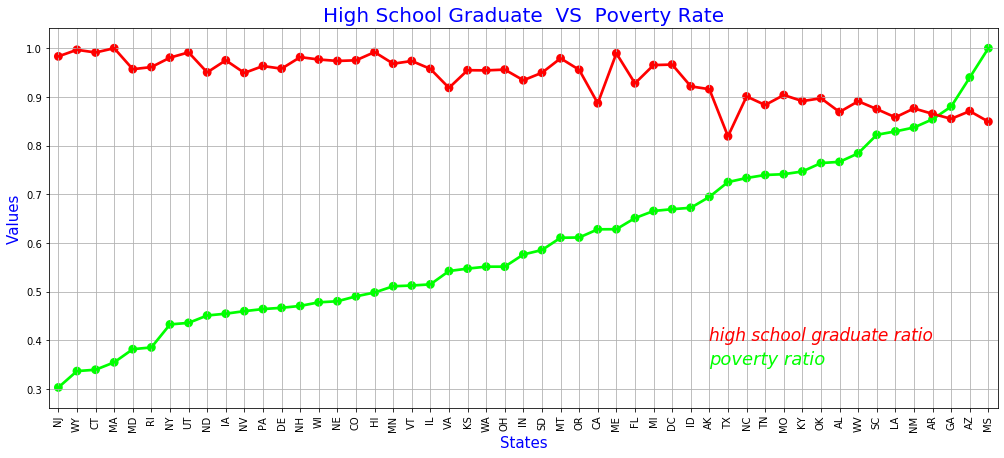

In [6]:
# %% High school graduation rate vs poverty rate of each state
# Pointplot
# normalization
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio'] / max(sorted_data['area_poverty_ratio'])
sorted_data2['area_hs_grad_ratio'] = sorted_data2['area_hs_grad_ratio'] / max(sorted_data2['area_hs_grad_ratio'])
data=pd.concat([sorted_data,sorted_data2['area_hs_grad_ratio']],axis=1)
data.sort_values('area_poverty_ratio', inplace=True)

# visualization
f, ax1 = plt.subplots(figsize=(17,7))
sns.pointplot('area_list', 'area_poverty_ratio', data=data, color='lime', alpha = 0.8)
sns.pointplot('area_list', 'area_hs_grad_ratio', data=data, color='red', alpha = 0.8)
plt.text(35,0.4,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(35,0.35,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xticks(rotation = 90)
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()

C:\Users\berka\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


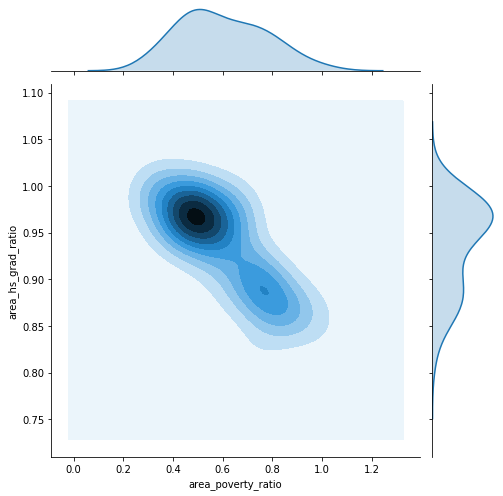

In [7]:
# %% High school graduation rate vs poverty rate of each state with different plot
# joint kernel density - Jointplot
# pearsonr > how much the closer to 1 , positive correlation between datas, how much the closer to -1, it's negative corr. if == 0 , no corr.
sns.jointplot(data.area_poverty_ratio, data.area_hs_grad_ratio, kind='kde', shade=True, size = 7, cut = 4) # shade > density , cut > data density size
plt.show()

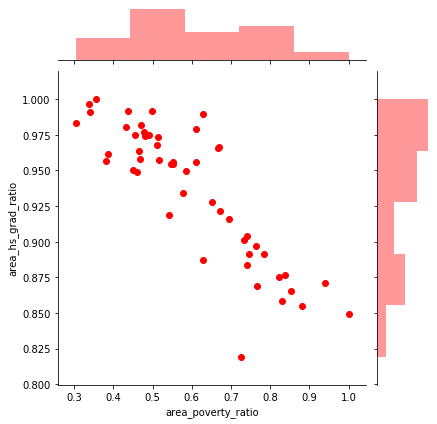

In [8]:
# with different usage , we can use > kind'' “scatter” | “reg” | “resid” | “kde” | “hex”, default = scatter
sns.jointplot('area_poverty_ratio', 'area_hs_grad_ratio', data=data, color='r')
plt.show()

C:\Users\berka\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


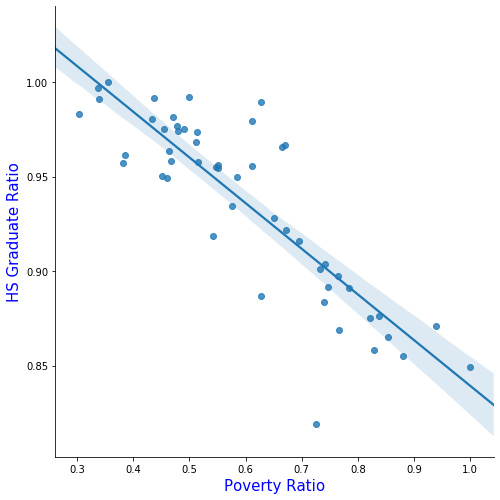

In [9]:
# %% High school graduation rate vs poverty rate of each state with different plot
# results of a linear regressian within each dataset - Lmplot

sns.lmplot('area_poverty_ratio', 'area_hs_grad_ratio', data=data, size = 7)
plt.xlabel('Poverty Ratio',fontsize = 15,color='blue')
plt.ylabel('HS Graduate Ratio',fontsize = 15,color='blue')
plt.show()

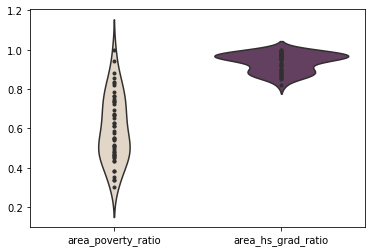

In [10]:
# %% High school graduation rate vs poverty rate of each state with different plot
# show each distribution with both violins and points - Violinplot
# using cubehelix to get a custom sequential palette

pal = sns.cubehelix_palette(2, rot=.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner='points', size=5)
plt.show()

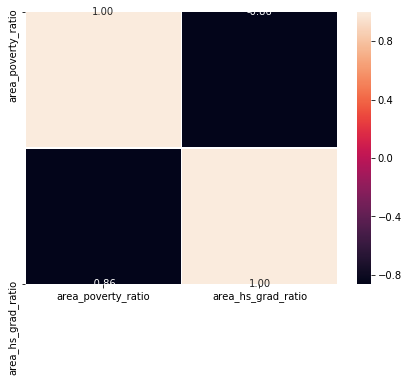

In [11]:
# %% High school graduation rate vs poverty rate of each state with different plot
# correlation about data

data.corr()
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(data.corr(), annot=True, linewidths = .5, fmt = '.2f', ax=ax)
plt.show()

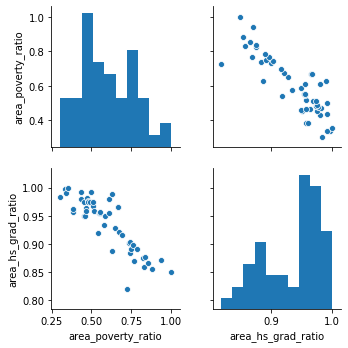

In [12]:
# %% High school graduation rate vs poverty rate of each state with different plot
# Pairplot

sns.pairplot(data)
plt.show()

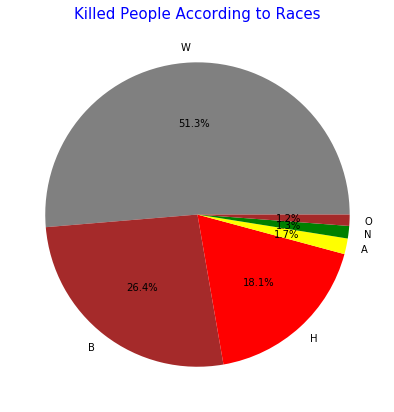

In [13]:
# %% Race rates according in dataframe - Pieplot

PoliceKillingsUS.race.dropna(inplace=True) # drop nan values
PoliceKillingsUS.race.value_counts()
labels = PoliceKillingsUS.race.value_counts().index
colors = ['gray','brown','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
sizes = PoliceKillingsUS.race.value_counts().values

# visualization 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races', color = 'blue', fontsize = 15)
plt.show()

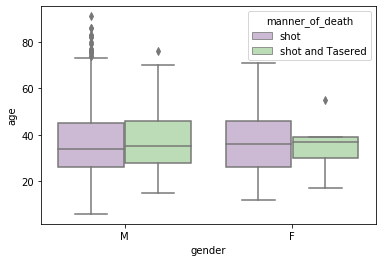

In [14]:
# %% Manner of death - Boxplot

sns.boxplot(x='gender',y='age', hue = 'manner_of_death', data=PoliceKillingsUS, palette='PRGn') # visualization's classification
plt.show()

C:\Users\berka\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\berka\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


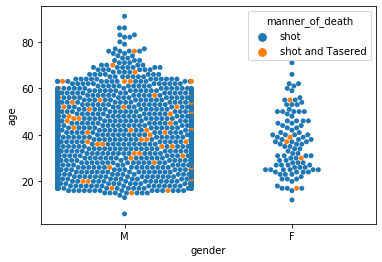

In [15]:
# %% Manner of death with different plot - Swarmplot

sns.swarmplot(x='gender',y='age', hue = 'manner_of_death', data=PoliceKillingsUS) # visualization's classification
plt.show()

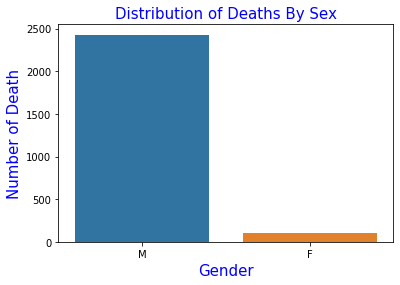

In [16]:
# %% Manner of death with different plot - Countplot

PoliceKillingsUS.manner_of_death.value_counts()
PoliceKillingsUS.gender.value_counts()

sns.countplot(PoliceKillingsUS.gender)
plt.ylabel('Number of Death', color = 'blue', fontsize=15)
plt.xlabel('Gender', color = 'blue', fontsize=15)
plt.title('Distribution of Deaths By Sex', color = 'blue', fontsize=15)
plt.show()

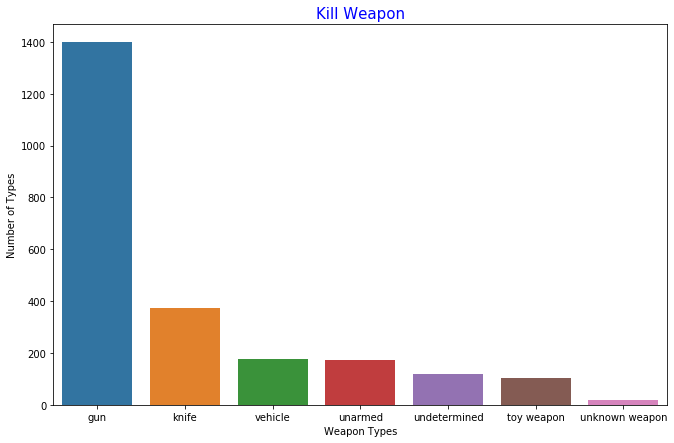

In [17]:
# %% Kill Weapon - Barplot

armed = PoliceKillingsUS.armed.value_counts()
plt.figure(figsize=(11,7))
sns.barplot(armed[:7].index, armed[:7].values)
plt.xlabel('Weapon Types')
plt.ylabel('Number of Types')
plt.title('Kill Weapon', color='blue', fontsize=15)
plt.show()

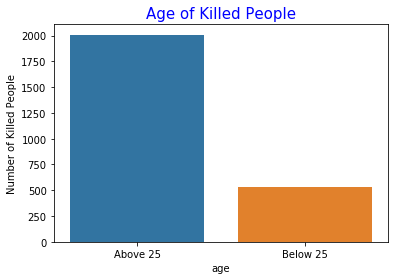

In [18]:
# %% Age of Killed People

filter25 = ['Above 25' if i >= 25 else 'Below 25' for i in PoliceKillingsUS.age]
data2 = pd.DataFrame({'age' : filter25})

sns.countplot(data2.age)
plt.ylabel('Number of Killed People')
plt.title('Age of Killed People',color='blue', fontsize=15)
plt.show()

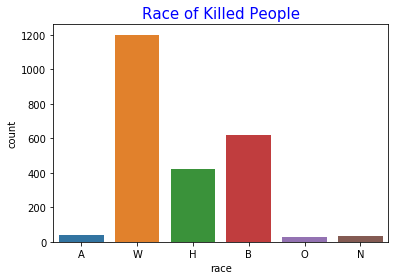

In [19]:
# %% Race of Killed People

sns.countplot(x='race', data=PoliceKillingsUS)
plt.title('Race of Killed People',color='blue', fontsize=15)
plt.show()

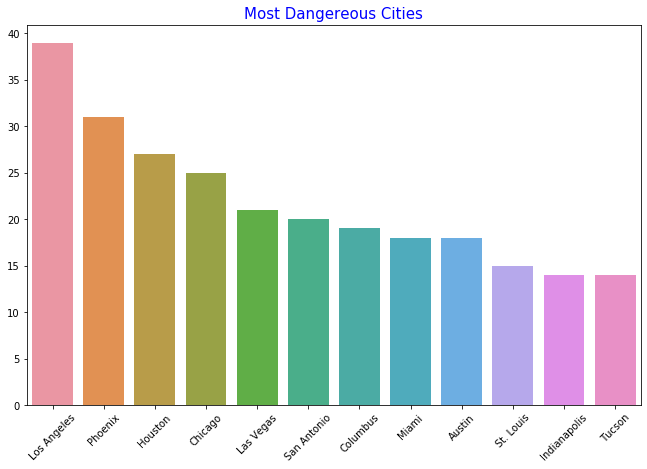

In [20]:
# %% Most Dangereous Cities

city = PoliceKillingsUS.city.value_counts()
plt.figure(figsize=(11,7))
sns.barplot(city[:12].index, city[:12].values)
plt.xticks(rotation = 45)
plt.title('Most Dangereous Cities', color='blue', fontsize=15)
plt.show()

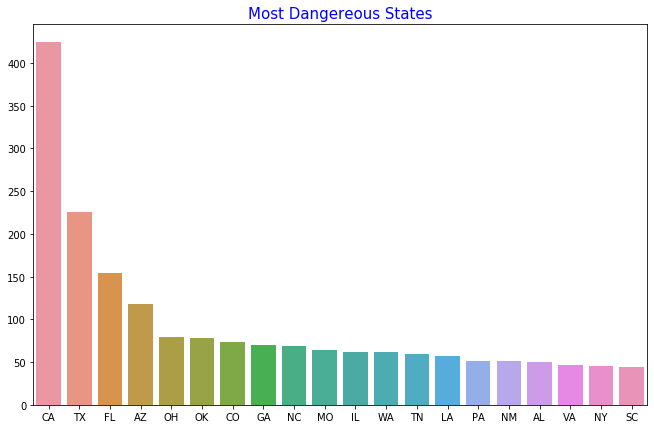

In [21]:
# %% Most Dangereous States

state = PoliceKillingsUS.state.value_counts()
plt.figure(figsize=(11,7))
sns.barplot(state[:20].index, state[:20].values)
plt.title('Most Dangereous States', color='blue', fontsize=15)
plt.show()

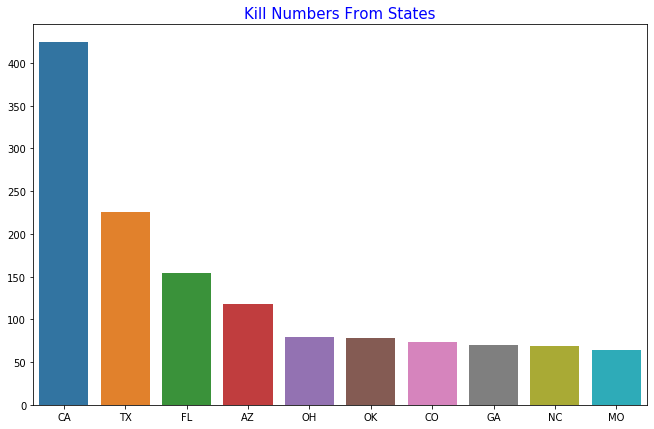

In [22]:
# %% Kill Numbers From States in Kill Data

sta = PoliceKillingsUS.state.value_counts().index[:10]
plt.figure(figsize=(11,7))
sns.barplot(sta, PoliceKillingsUS.state.value_counts().values[:10])
plt.title('Kill Numbers From States', color='blue', fontsize=15)
plt.show()